# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

In [ ]:
cities

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url + "&q=san francisco")

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=f48463ba12e2a89fdf8be8bc41dafac0&q=san francisco


In [8]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | huruta
Processing Record 2 of Set 1 | broome
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 9 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 10 of Set 1 | kasane
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | pasargad
City not found. Skipping...
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | ahau
City not found. Skipping...
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | floro
Processing Record 19 of Set 1 | badger
Processi

Processing Record 42 of Set 4 | alakurtti
Processing Record 43 of Set 4 | nelson bay
Processing Record 44 of Set 4 | chibougamau
Processing Record 45 of Set 4 | santa rosa del sur
Processing Record 46 of Set 4 | salekhard
Processing Record 47 of Set 4 | san rafael
Processing Record 48 of Set 4 | lihue
Processing Record 49 of Set 4 | kapa'a
Processing Record 0 of Set 5 | richards bay
Processing Record 1 of Set 5 | krasnik
Processing Record 2 of Set 5 | kerikeri
Processing Record 3 of Set 5 | cockburn town
Processing Record 4 of Set 5 | bonthe
Processing Record 5 of Set 5 | devin
Processing Record 6 of Set 5 | hasaki
Processing Record 7 of Set 5 | nukunonu
City not found. Skipping...
Processing Record 8 of Set 5 | mossel bay
Processing Record 9 of Set 5 | port alfred
Processing Record 10 of Set 5 | dar chioukh
Processing Record 11 of Set 5 | miles city
Processing Record 12 of Set 5 | lambayong
Processing Record 13 of Set 5 | flying fish cove
Processing Record 14 of Set 5 | bayji
Processi

Processing Record 34 of Set 8 | nuevo laredo
Processing Record 35 of Set 8 | island harbour
Processing Record 36 of Set 8 | oneida
Processing Record 37 of Set 8 | iskateley
Processing Record 38 of Set 8 | kruisfontein
Processing Record 39 of Set 8 | jaru
Processing Record 40 of Set 8 | izmail
Processing Record 41 of Set 8 | saint-philippe
Processing Record 42 of Set 8 | jiuquan
Processing Record 43 of Set 8 | taroudant
Processing Record 44 of Set 8 | klaksvik
Processing Record 45 of Set 8 | oranjemund
Processing Record 46 of Set 8 | kudahuvadhoo
Processing Record 47 of Set 8 | santo antonio do ica
Processing Record 48 of Set 8 | kassala
Processing Record 49 of Set 8 | kailua-kona
Processing Record 0 of Set 9 | khandyga
Processing Record 1 of Set 9 | kidatu
Processing Record 2 of Set 9 | chinsali
Processing Record 3 of Set 9 | colonial heights
Processing Record 4 of Set 9 | kilju
Processing Record 5 of Set 9 | dudinka
Processing Record 6 of Set 9 | pingliang
Processing Record 7 of Set 9

Processing Record 26 of Set 12 | xacmaz
Processing Record 27 of Set 12 | grand baie
Processing Record 28 of Set 12 | san luis de la loma
Processing Record 29 of Set 12 | fannuj
City not found. Skipping...
Processing Record 30 of Set 12 | yurimaguas
Processing Record 31 of Set 12 | bor
Processing Record 32 of Set 12 | kupang
Processing Record 33 of Set 12 | cranbrook
Processing Record 34 of Set 12 | la tuque
Processing Record 35 of Set 12 | la passe
Processing Record 36 of Set 12 | bloomfield
Processing Record 37 of Set 12 | tanki leendert
City not found. Skipping...
Processing Record 38 of Set 12 | aktau
Processing Record 39 of Set 12 | arica
Processing Record 40 of Set 12 | maun
Processing Record 41 of Set 12 | nyala
Processing Record 42 of Set 12 | praia da vitoria
Processing Record 43 of Set 12 | seryshevo
Processing Record 44 of Set 12 | comodoro rivadavia
Processing Record 45 of Set 12 | qapqal
City not found. Skipping...
Processing Record 46 of Set 12 | douz
Processing Record 47 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,huruta,8.1500,39.3500,15.82,69,73,1.09,ET,1686193130
1,broome,42.2506,-75.8330,11.48,73,98,0.89,US,1686193130
2,arraial do cabo,-22.9661,-42.0278,12.98,100,0,0.00,BR,1686193130
3,georgetown,5.4112,100.3354,31.96,79,20,3.09,MY,1686193106
4,port-aux-francais,-49.3500,70.2167,3.34,80,100,3.42,TF,1686193130


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,huruta,8.1500,39.3500,15.82,69,73,1.09,ET,1686193130
1,broome,42.2506,-75.8330,11.48,73,98,0.89,US,1686193130
2,arraial do cabo,-22.9661,-42.0278,12.98,100,0,0.00,BR,1686193130
3,georgetown,5.4112,100.3354,31.96,79,20,3.09,MY,1686193106
4,port-aux-francais,-49.3500,70.2167,3.34,80,100,3.42,TF,1686193130


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

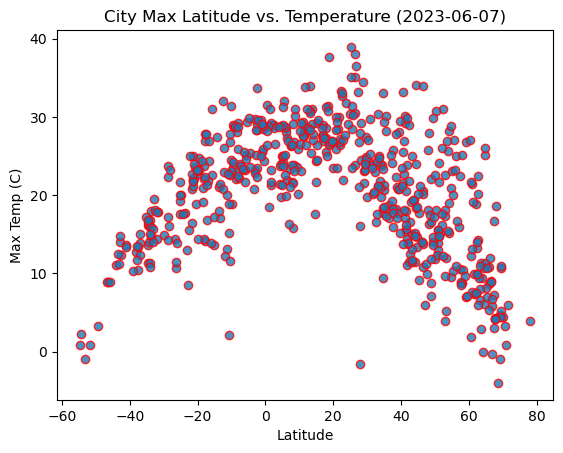

In [14]:
import time
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="red",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

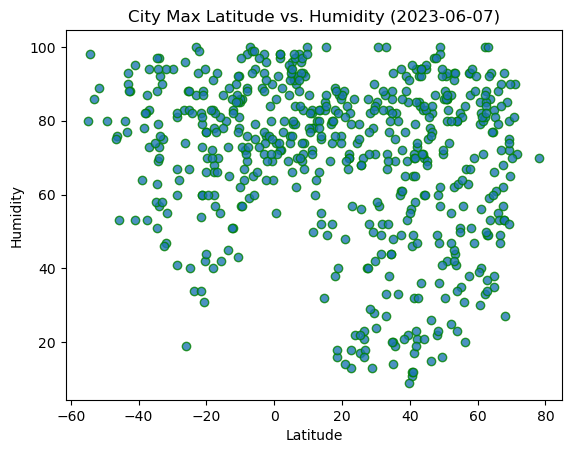

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="green",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

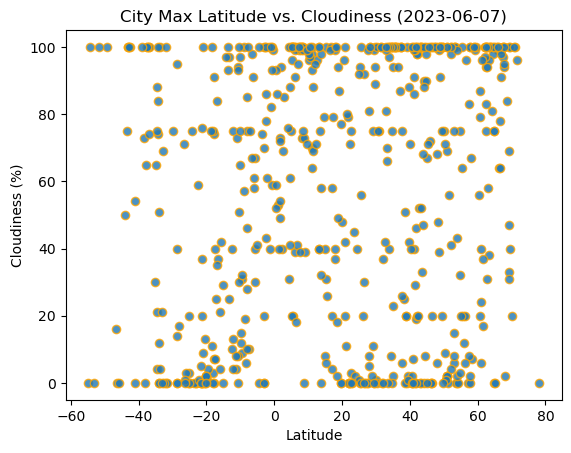

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="orange",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

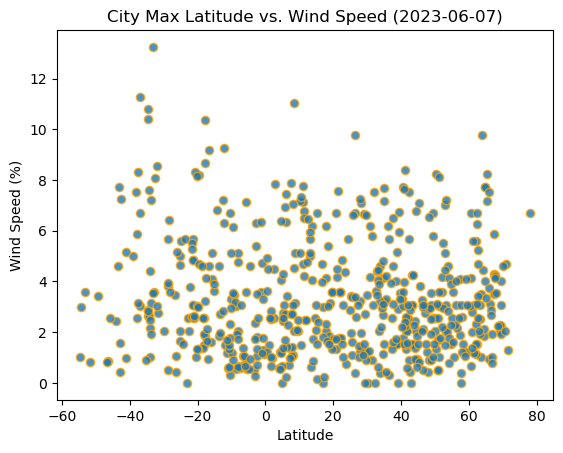

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="orange",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,huruta,8.1500,39.3500,15.82,69,73,1.09,ET,1686193130
1,broome,42.2506,-75.8330,11.48,73,98,0.89,US,1686193130
3,georgetown,5.4112,100.3354,31.96,79,20,3.09,MY,1686193106
5,albany,42.6001,-73.9662,12.51,85,100,0.45,US,1686193059
7,yellowknife,62.4560,-114.3525,13.29,88,75,1.54,CA,1686192632


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,arraial do cabo,-22.9661,-42.0278,12.98,100,0,0.00,BR,1686193130
4,port-aux-francais,-49.3500,70.2167,3.34,80,100,3.42,TF,1686193130
6,kasane,-17.8167,25.1500,14.20,60,0,1.86,BW,1686193131
9,grytviken,-54.2811,-36.5092,2.24,98,100,3.00,GS,1686193131
10,blackmans bay,-43.0167,147.3167,14.07,90,100,1.57,AU,1686193235


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.48241015996873626


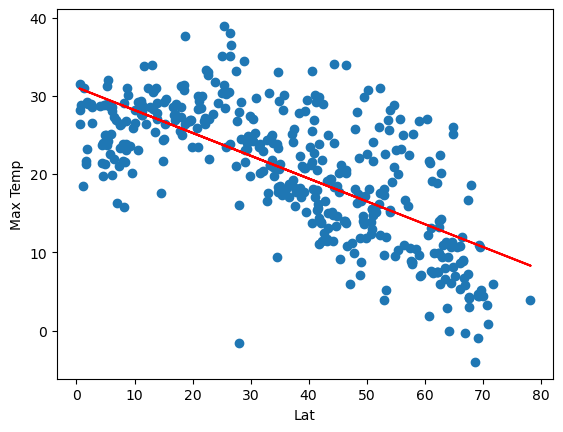

In [22]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6, -10))

The r-value is 0.6040130132352312


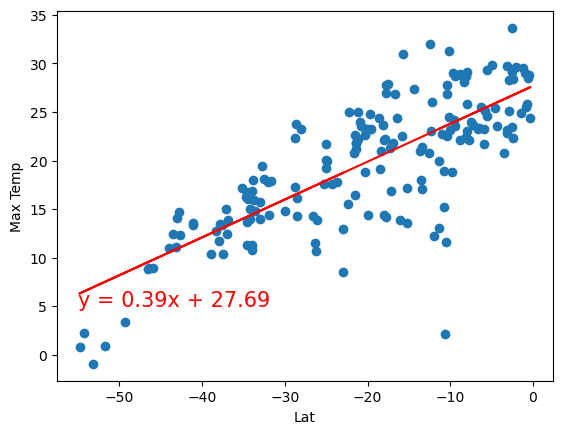

In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 5))

**Discussion about the linear relationship:** There is an upward tendancy

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.0208912837023478


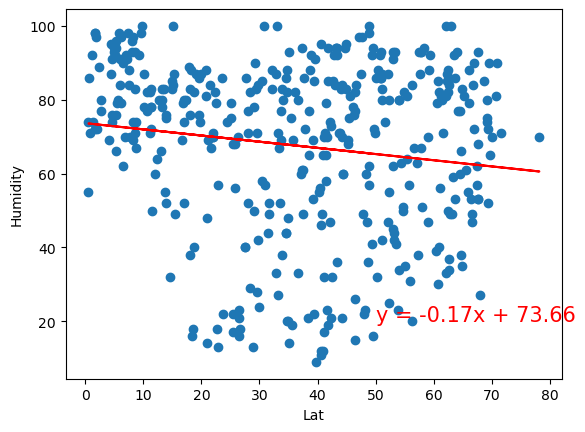

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (50, 20))

The r-value is 0.0005687513402396902


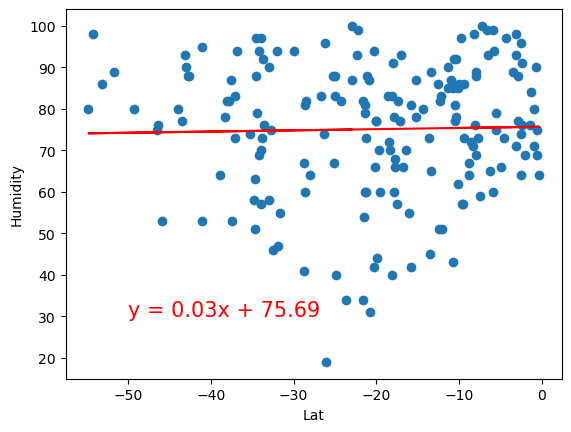

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 30))

**Discussion about the linear relationship:** It is constant

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.00022493308469077143


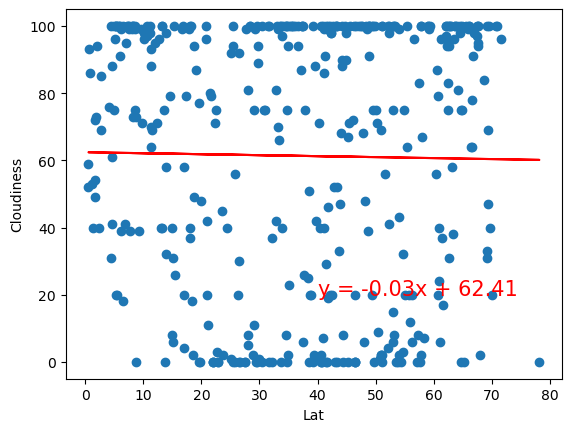

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40, 20))

The r-value is 0.0005687513402396902


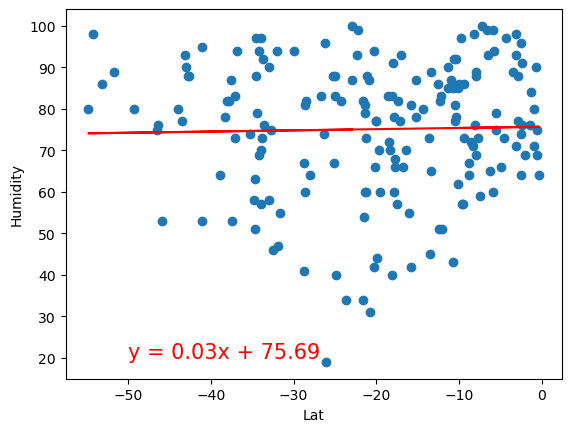

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

**Discussion about the linear relationship:** These show as being constant

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0002833181172357107


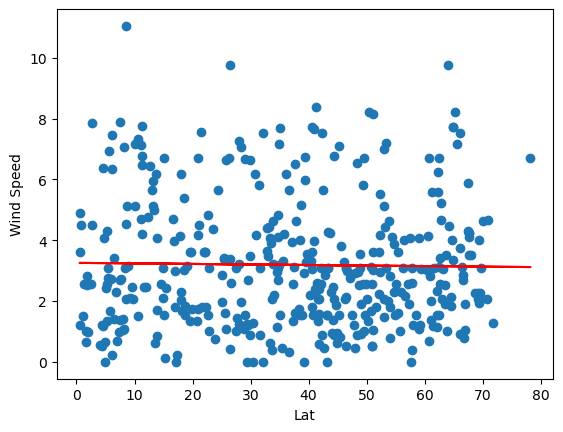

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10, 15))

The r-value is 0.04271349680857303


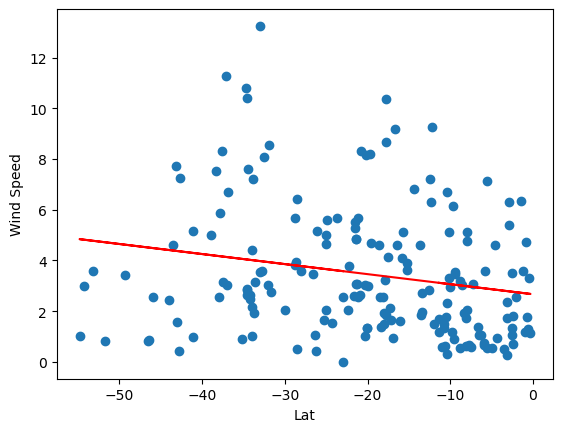

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (50, 20))

**Discussion about the linear relationship:** These last two show a slight decrease